# Wind Farms (Foreshore Process)

<https://data.gov.ie/dataset/wind-farms-foreshore-process>

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "wind-farms-foreshore-process")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "803a4ecc22aa4cc09111072a0bbc4fac_2/downloads/"
    "data?format=shp&spatialRefId=4326&where=1%3D1"
)
KNOWN_HASH = None
FILE_NAME = "wind-farms-foreshore-process.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# boundary data
ie = gpd.read_file(
    os.path.join("data", "boundaries.gpkg"), layer="NUTS_RG_01M_2021_4326_IE"
)

In [3]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-4]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: eb0f0c1b14a0db959b47795a623d0e8b74bfb32285656905ae30136a4e34446b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [3]:
ZipFile(DATA_FILE).namelist()

['Energy_Offshore_Renewable.shp',
 'Energy_Offshore_Renewable.shx',
 'Energy_Offshore_Renewable.dbf',
 'Energy_Offshore_Renewable.cpg',
 'Energy_Offshore_Renewable.prj',
 'Energy_Offshore_Renewable.xml']

In [4]:
wind_farms = gpd.read_file(
    os.path.join(f"zip://{DATA_FILE}!Energy_Offshore_Renewable.shp")
)

In [6]:
wind_farms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
wind_farms.shape

(19, 23)

In [17]:
wind_farms.columns

Index(['OBJECTID', 'Name', 'Type', 'MDM_Catego', 'NMPF_Chapt', 'NMPF_Cha_1',
       'Map_Featur', 'Map_Data_S', 'Last_Updat', 'Policy01_N', 'Policy02_N',
       'Policy03_N', 'Owning_Org', 'Metadata_L', 'Policy01_P', 'Policy01_C',
       'Policy02_P', 'Policy02_C', 'Policy03_P', 'Policy03_C', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

In [22]:
wind_farms[["Name", "Type", "MDM_Catego"]]

,Name,Type,MDM_Catego
0,Arklow Bank Phase 2,Fixed-Bottom,Site Investigations
1,Kilmichael Point\r\nKilmichael Point,Fixed-Bottom,Site Investigations
2,Codling Wind Park Extension,Fixed-Bottom,Relevant Projects
3,Codling Wind Park,Fixed-Bottom,Relevant Projects
4,Dublin Array,Fixed-Bottom,Relevant Projects
5,Oriel Wind Farm,Fixed-Bottom,Relevant Projects
6,Clogher Head,Fixed-Bottom,Site Investigations
7,North Irish Sea Array (NISA),Fixed-Bottom,Relevant Projects
8,Sceirde (Skerd) Rocks,Fixed-Bottom,Relevant Projects
9,Arklow Bank Phase I,Fixed-Bottom,Fully Commissioned


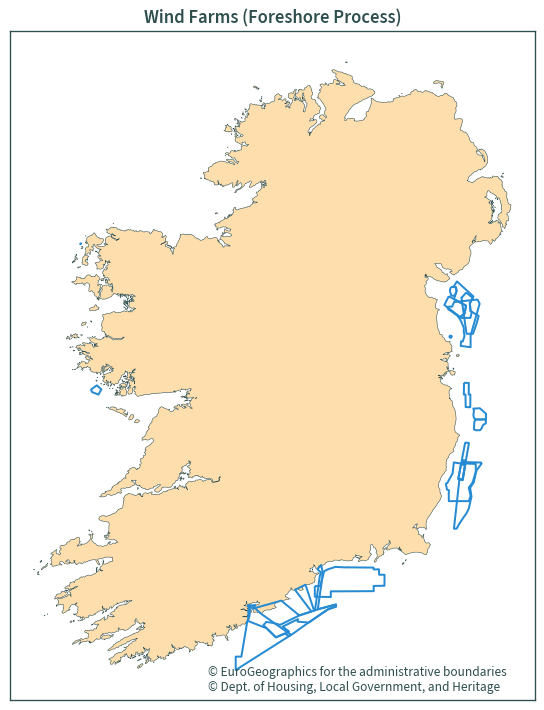

In [24]:
ax = ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)
wind_farms.boundary.plot(ax=ax)

plt.title("Wind Farms (Foreshore Process)")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries\n"
    "© Dept. of Housing, Local Government, and Heritage"
)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()